In [43]:
import geopandas as gpd

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [9]:
#reading the data(shapefile).

world_data = gpd.read_file('world.shp')


In [10]:
type(world_data)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

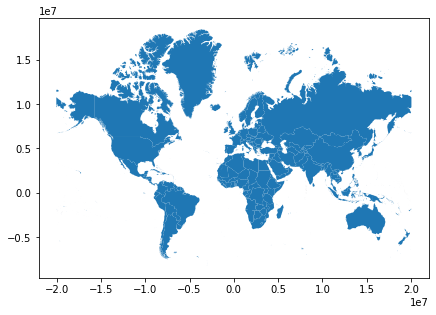

In [55]:
world_data.plot(figsize = (7,7))

In [18]:
world_data = world_data[['NAME','geometry']]

world_data.head()

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [24]:
#Calculating the areas of Countries.

world_data['Areas'] = world_data.area

world_data.head()

,NAME,geometry,Areas
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093


<AxesSubplot:>

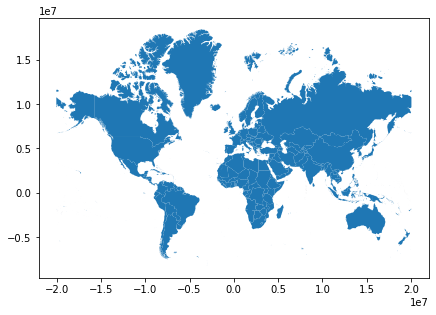

In [52]:
#Removing the Antarctica from Geodataframe.

world_data = world_data[world_data['NAME']!= 'Antarctica']

world_data.plot(figsize = (7,7))

In [29]:
#Changing the Projection.

current_crs = world_data.crs

current_crs

{'init': 'epsg:4326'}

In [30]:
world_data.to_crs(epsg = 3857, inplace = True)

,NAME,geometry,Areas
0,Antigua and Barbuda,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",5.993606e+02
1,Algeria,"POLYGON ((329907.556 4411573.988, 331886.705 4...",3.014479e+06
2,Azerbaijan,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",1.478874e+05
3,Albania,"POLYGON ((2163629.445 5015449.243, 2165225.767...",5.062603e+04
4,Armenia,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",5.104906e+04


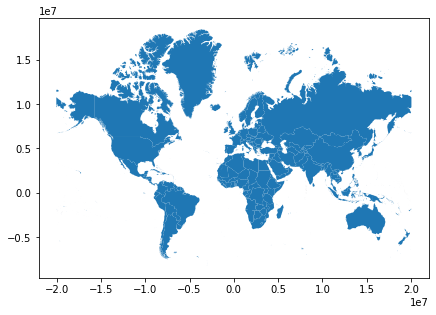

In [53]:
world_data.plot(figsize = (7,7))

#compare the Geometry with the previous one.
world_data.head()

<AxesSubplot:>

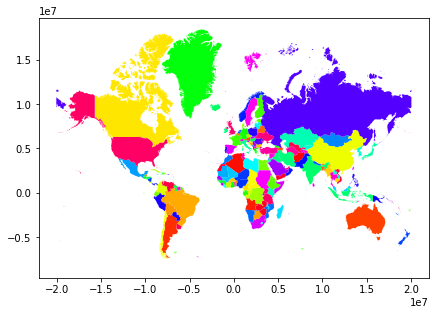

In [54]:
#change the color of the plot depending on the column(hsv,jet and others.)

world_data.plot(column = 'NAME', cmap = 'hsv' , figsize = (7,7))

In [37]:
#re-calculate the areas in sq. KM

world_data['Areas'] = world_data.area/1000000

world_data.head()

,NAME,geometry,Areas
0,Antigua and Barbuda,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",5.993606e+02
1,Algeria,"POLYGON ((329907.556 4411573.988, 331886.705 4...",3.014479e+06
2,Azerbaijan,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",1.478874e+05
3,Albania,"POLYGON ((2163629.445 5015449.243, 2165225.767...",5.062603e+04
4,Armenia,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",5.104906e+04


<AxesSubplot:>

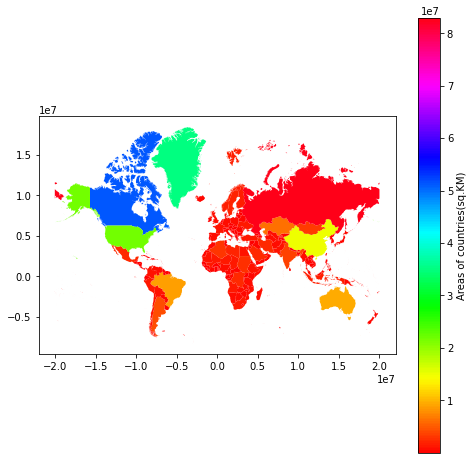

In [51]:
#Adding the legend

world_data.plot(column = 'Areas', cmap ='hsv' , legend = True,
                legend_kwds = {'label':'Areas of countries(sq.KM)'}, figsize =(8,8) )

<AxesSubplot:>

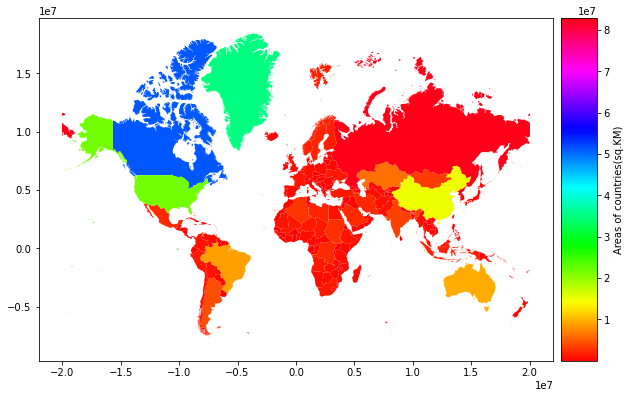

In [49]:
#Resizing the legend
fig , ax=plt.subplots(figsize= (10,10))

divider = make_axes_locatable(ax)

cax = divider.append_axes('right',size='7%', pad = 0.1 )

world_data.plot(column = 'Areas', cmap ='hsv' , legend = True,
                legend_kwds = {'label':'Areas of countries(sq.KM)'},
               ax = ax, cax = cax)